# DATA CLEANING AND PRE PROCESSING


1. Import Necessary Libraries: Learn the essential libraries required for efficient data manipulation and analysis.

2. Read File: Understand how to import data from various sources and formats into your Python environment.

3. Sanity Check:
    - Identify and handle missing values effectively.
    - Explore the dataset's shape, information, and spot duplicates.
    - Conduct a garbage check to maintain data integrity.

4. Exploratory Data Analysis (EDA):
    - Dive into descriptive statistics for a deeper understanding of your data.
    - Visualize data distributions with histograms and box plots.
    - Uncover patterns and relationships with scatter plots and correlation heatmaps.

5. Missing Value Treatment:
    - Implement strategies using mode, median, and KNNImputer to handle missing data.

6. Outlier Treatment:
    - Explore methods to detect and deal with outliers that can impact model performance.

7. Encoding of Data:
    - Convert categorical variables into a format suitable for machine learning algorithms.

# 1. Import Necessary Libraries 

In [395]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [396]:
# Reading the dataset

# https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
df = pd.read_csv(r"Life Expectancy Data.csv")

In [397]:
# First 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [398]:
# Last 5 rows
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [399]:
# Number of rows and columns of dataframe
df.shape

(2938, 22)

In [400]:
# Basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [401]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# 2. Rename & Clean Column Names

In [402]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [403]:
# removing the empty spaces
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

# 3. Check for Duplicates

In [404]:
# Identifying duplicate values
df.duplicated().sum()

np.int64(0)

In [405]:
# if duplicates were present
# df = df.drop_duplicates()

# 4. Handling Garbage data

In [406]:
df.select_dtypes(include='object')

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [407]:
# Identifying garbage values
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("***" * 10)

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64
******************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
******************************


as it only shows some of the values, we can see the entire result in a separate csv file

In [408]:
for i in df.select_dtypes(include='object').columns:
    df[i].value_counts().to_csv(f'value_counts_{i}.csv')

# 5. Handling Missing data

In [409]:
# Identifying missing values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

if the missing value percentage is very high in any column, we can decide by either deleting the column(>50%) or filling the column with other values

In [410]:
# missing values percentage
df.isna().sum() / df.shape[0] * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life_expectancy                     0.340368
Adult_Mortality                     0.340368
infant_deaths                       0.000000
Alcohol                             6.603131
percentage_expenditure              0.000000
Hepatitis_B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five_deaths                   0.000000
Polio                               0.646698
Total_expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness_1-19_years                 1.157250
thinness_5-9_years                  1.157250
Income_composition_of_resources     5.684139
Schooling                           5.547992
dtype: flo

In [411]:
# Rows with at least one missing value
df[df.isnull().any(axis=1)]  

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [412]:
# U can drop rows or columns with these commands

# df.dropna()  # drop rows with any missing value
# df.dropna(subset=['Column1', 'Column2'])  # drop rows only if specific cols are missing
# df.drop(columns=['Useless_Column'])  # drop columns entirely

| Fill Method | Use When                                |
| ----------- | --------------------------------------- |
| **Mean**    | Distribution is normal and outlier-free |
| **Median**  | Data has outliers or is skewed          |
| **Mode**    | For categorical or discrete data        |

In [413]:
# numerical columns having null values
null_num_cols = [x for x in df.select_dtypes('number').columns if (x != 'Life_expectancy') & (df[x].isna().sum() > 0)]
null_num_cols

['Adult_Mortality',
 'Alcohol',
 'Hepatitis_B',
 'BMI',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'thinness_1-19_years',
 'thinness_5-9_years',
 'Income_composition_of_resources',
 'Schooling']

In [414]:
# categorical columns having null values
null_cate_cols = [x for x in df.select_dtypes('object').columns if df[x].isna().sum() > 0]
null_cate_cols

[]

# 6. EDA

In [415]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [416]:
df.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


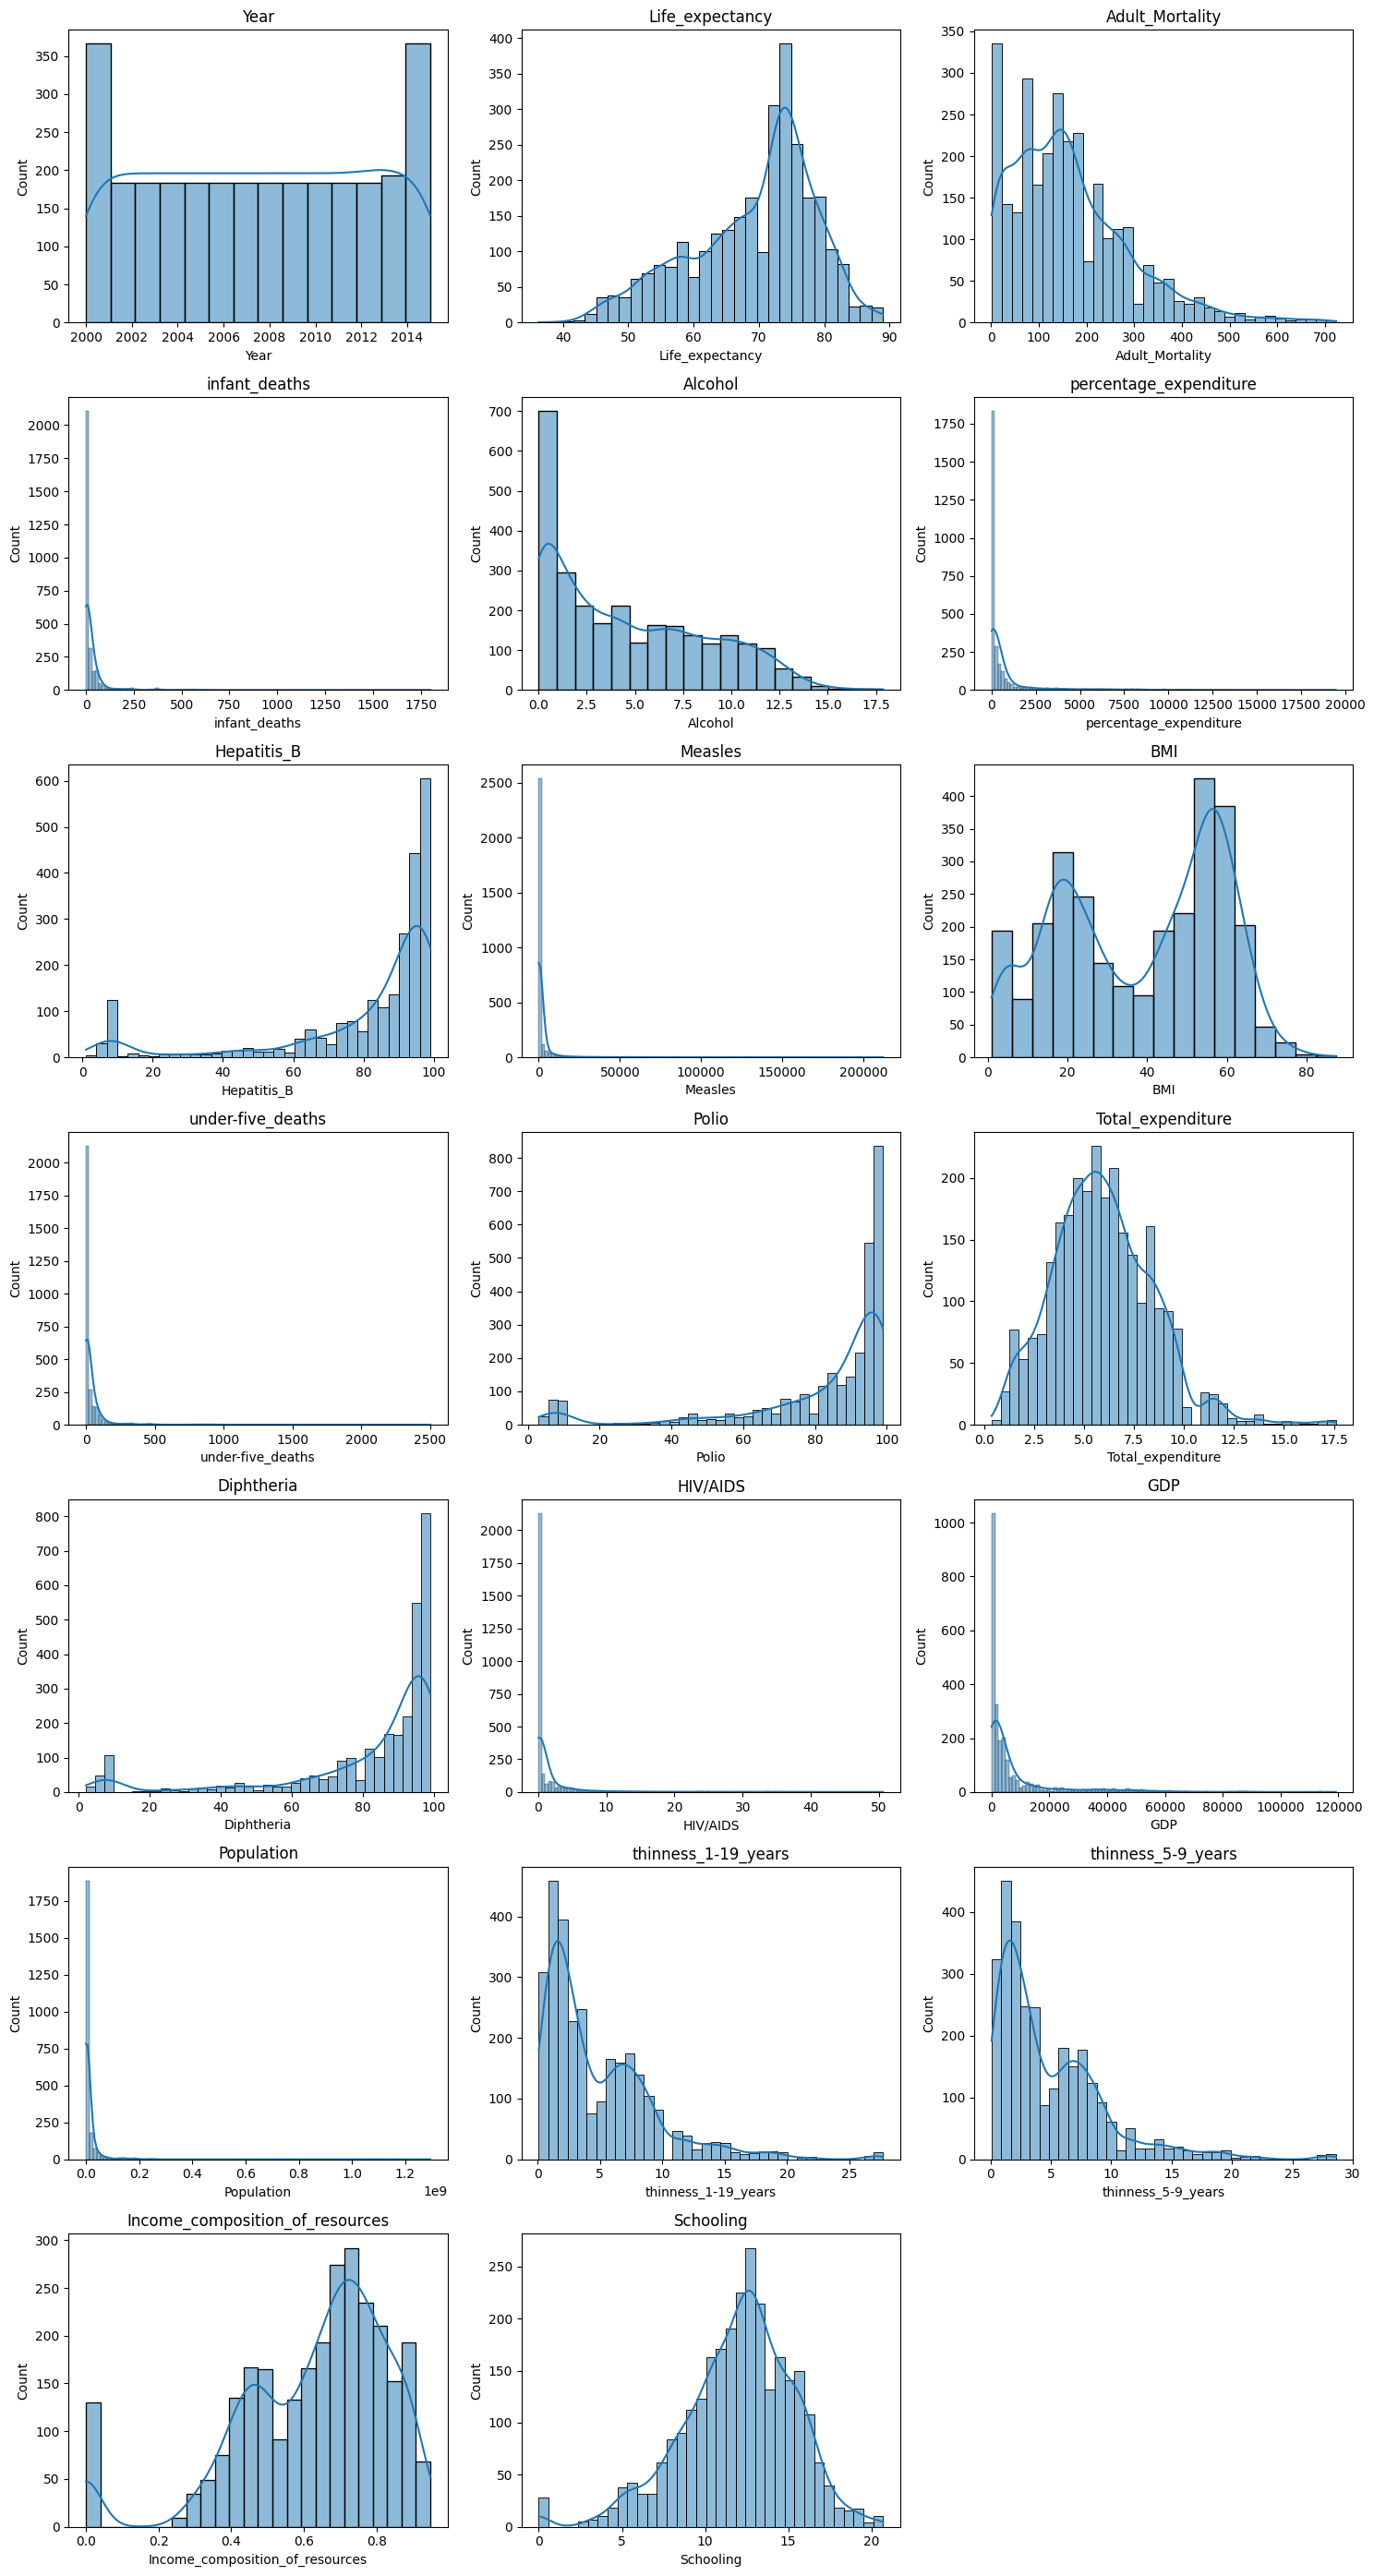

In [417]:
# Histogram to understand the distribution

# import warnings
# warnings.filterwarnings('ignore')

# for i in df.select_dtypes('number').columns:
#     sns.histplot(df, x=i, kde=True)
#     plt.show()

num_cols = df.select_dtypes('number').columns
n = len(num_cols)
rows = (n // 3) + 1

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


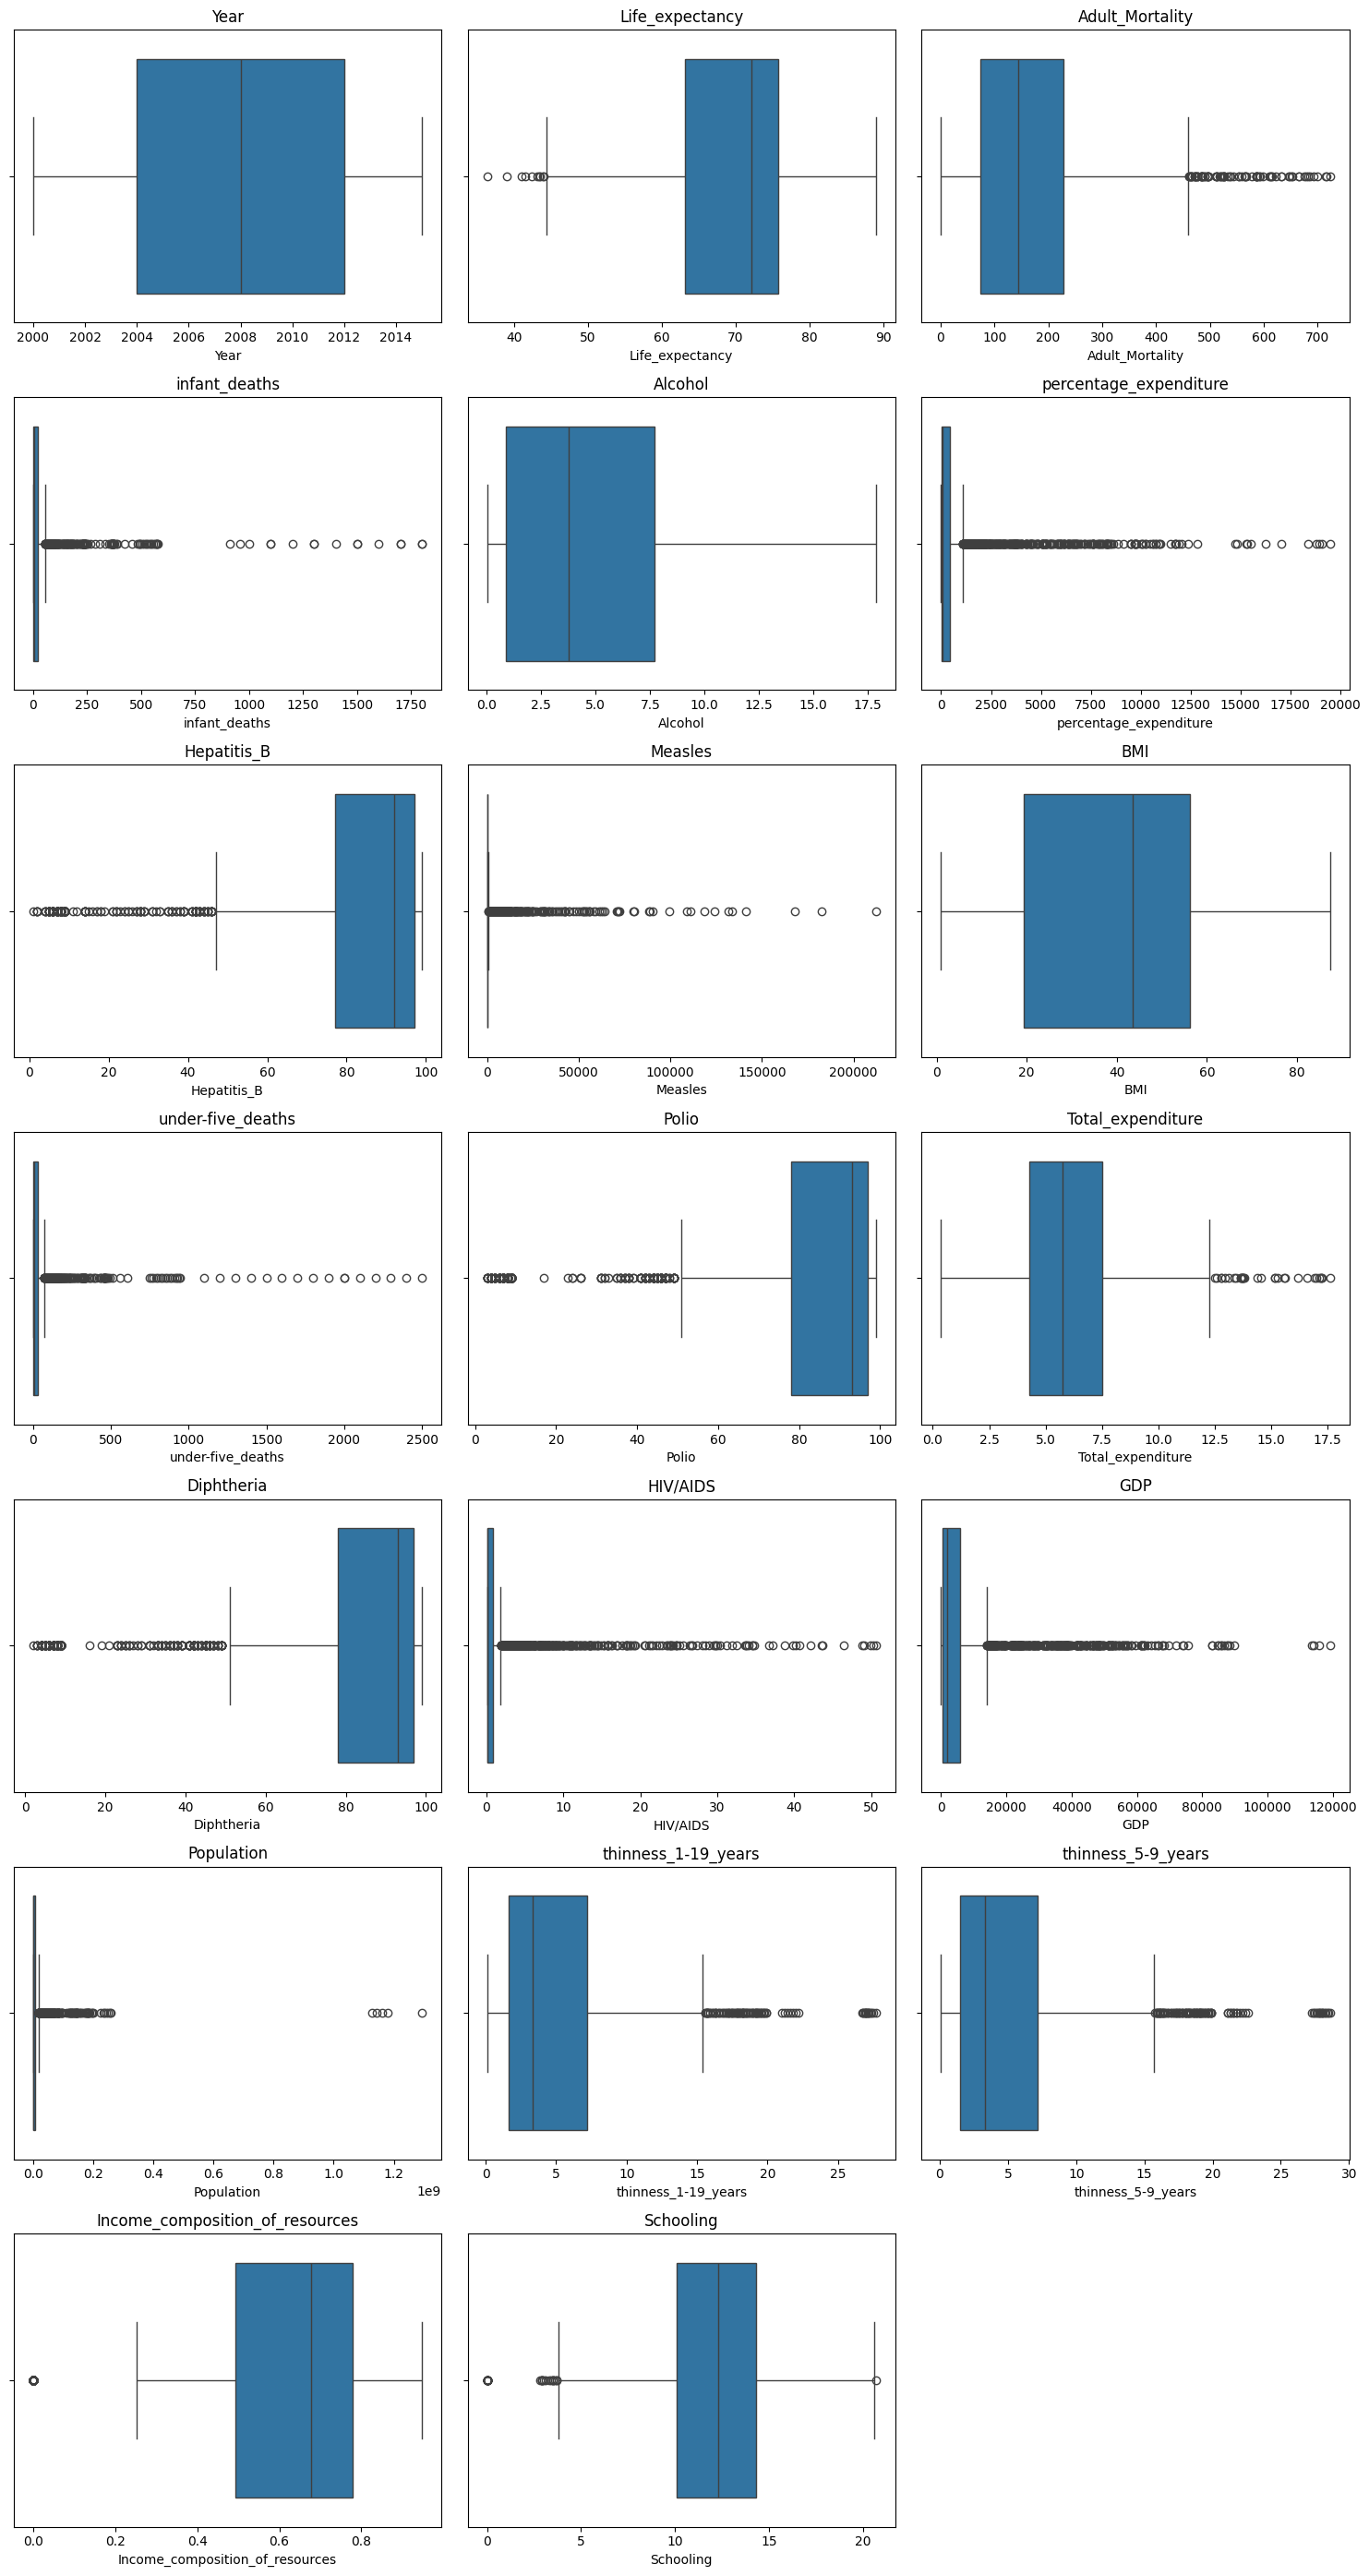

In [418]:
# Boxplot to identify outliers

num_cols = df.select_dtypes('number').columns
rows = len(num_cols) // 3 + 1

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*4))
axes = axes.flatten()   # Flatten to 1D array for easy indexing

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(ax=axes[j])

plt.tight_layout()
plt.show()

In [419]:
df.select_dtypes('number').columns 

Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

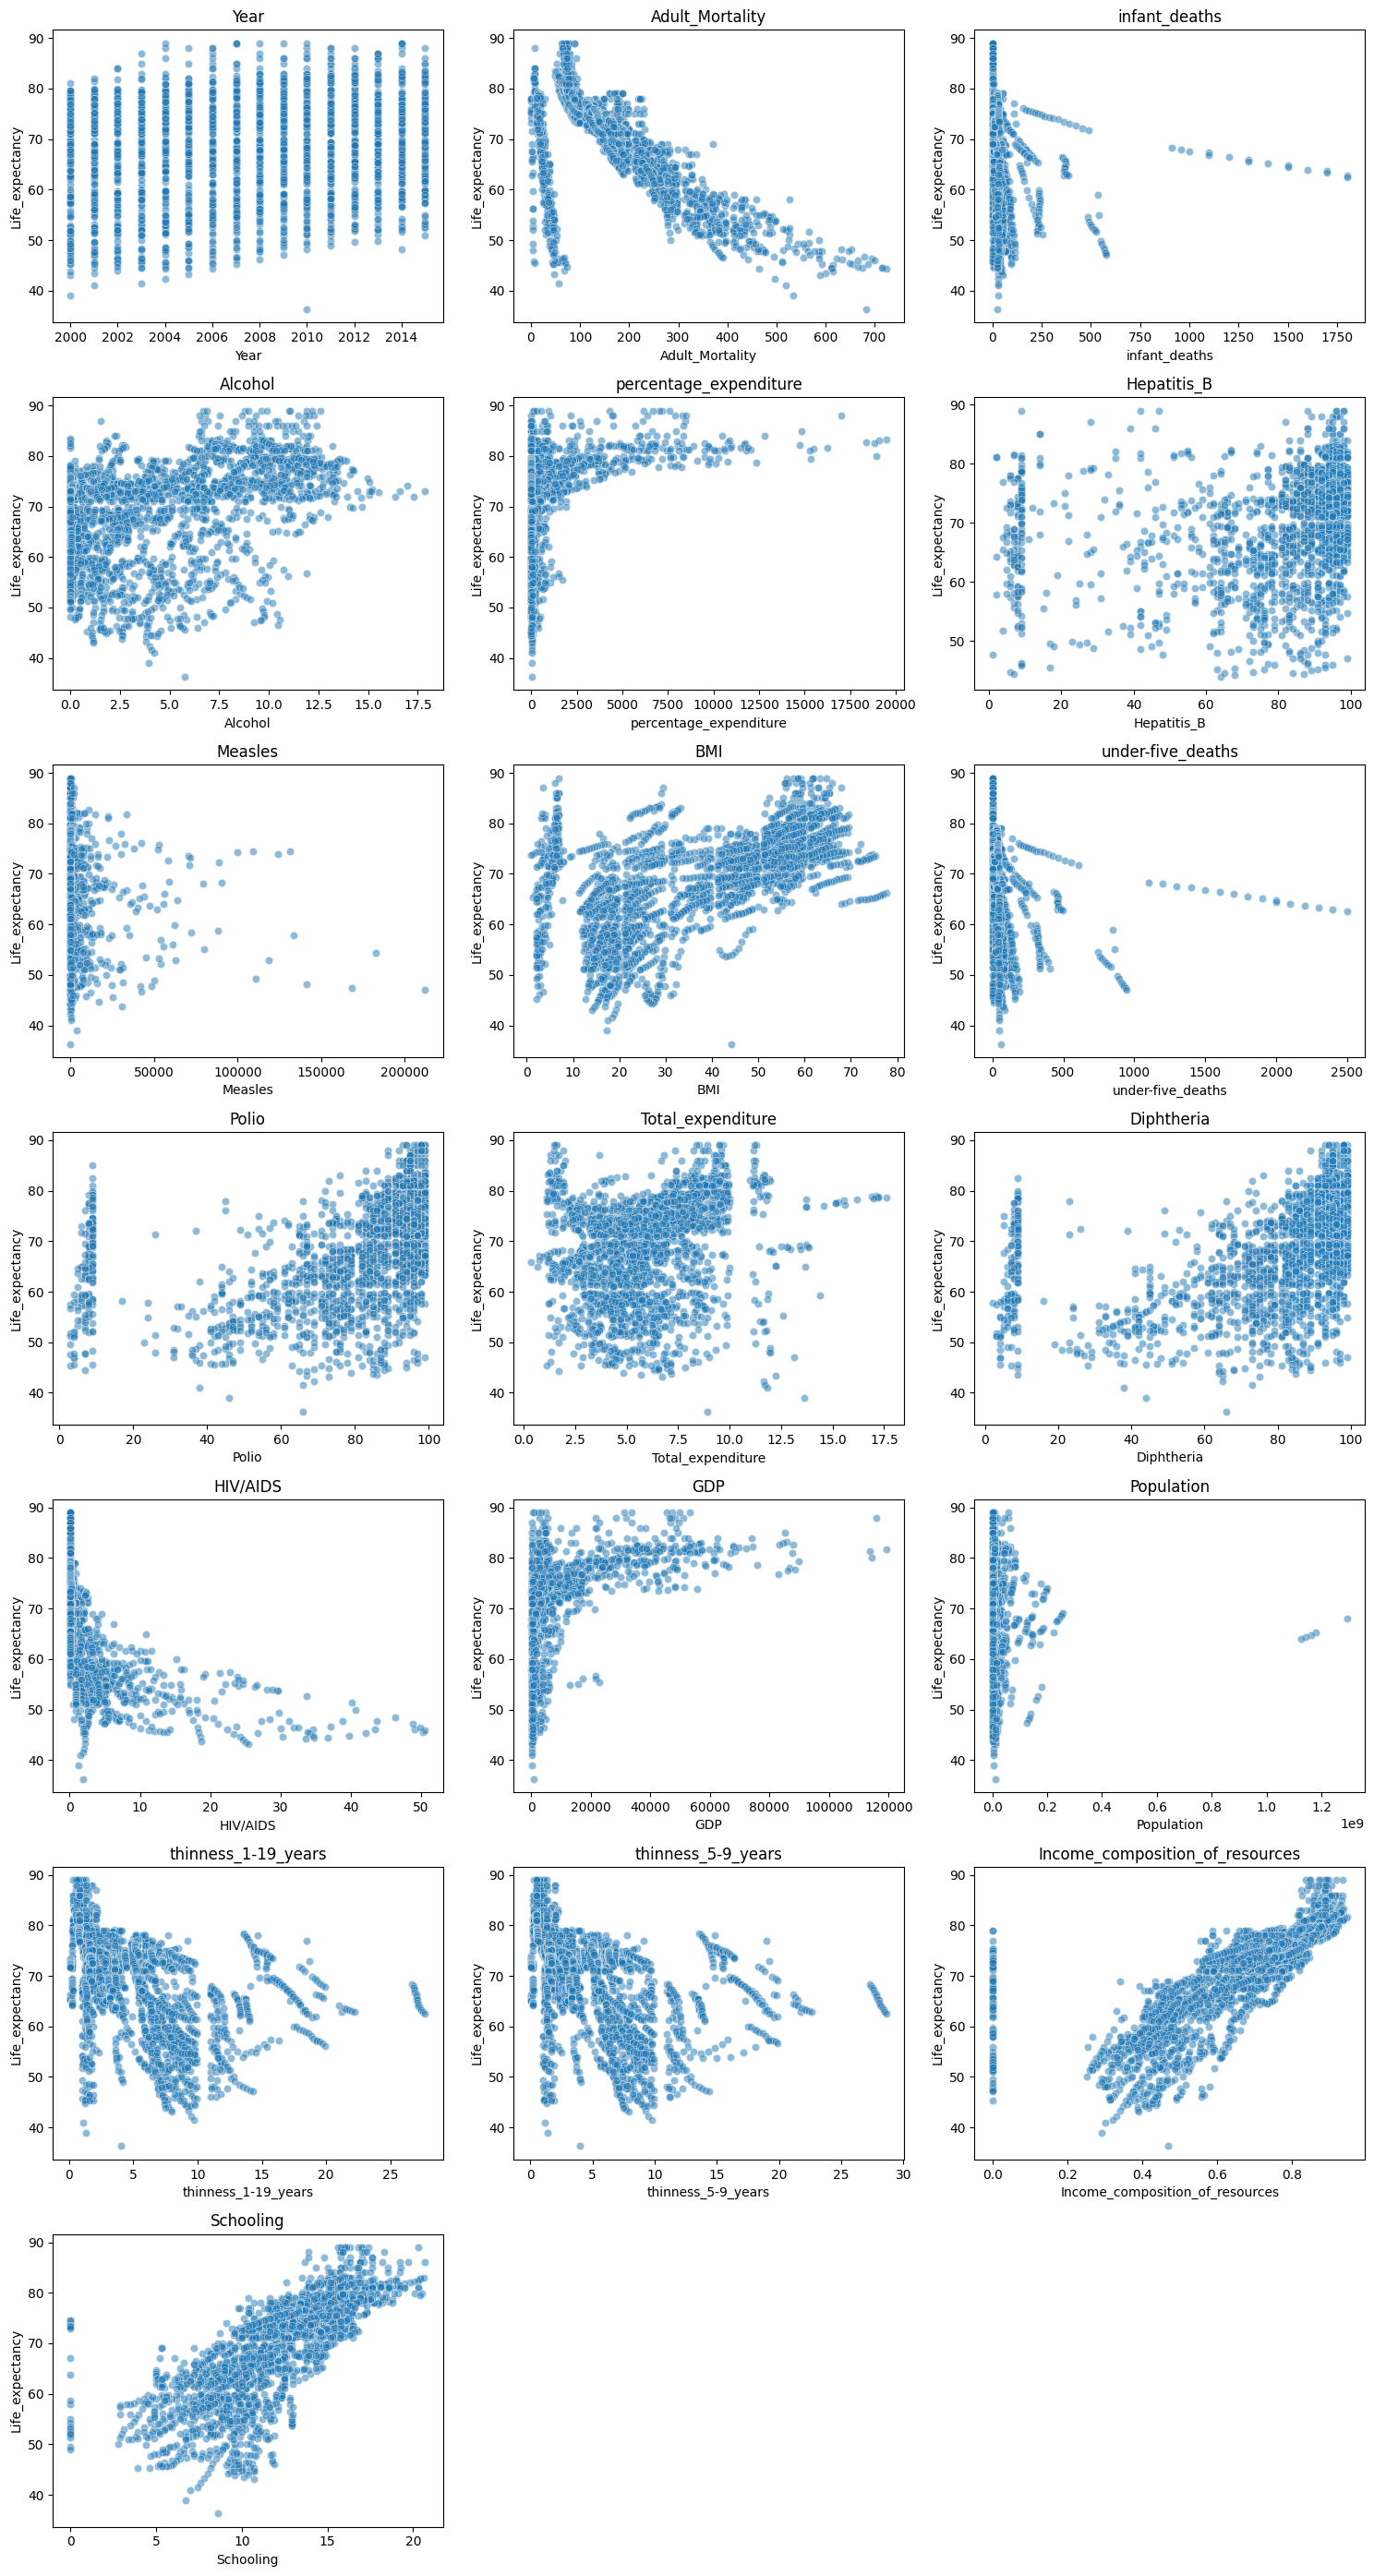

In [420]:
# Scatter plot to understand the relationship

#in this dataset:
    # target = 'Life expectancy'
    # features = all the other columns

num_cols = df.select_dtypes('number').columns
num_cols = [x for x in num_cols if x != 'Life_expectancy'] 
rows = len(num_cols) // 3 + 1

fig, axes = plt.subplots(rows, 3, figsize=(15, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if(col == 'Life_expectancy'):
        continue
    sns.scatterplot(df, x=col, y='Life_expectancy', ax=axes[i], alpha=0.5)
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(ax=axes[j])

plt.tight_layout()
plt.show()

U can also use **pair plot** to find the co relation between different features but it is suitable to use if columns<10

Else use **heat map** to get the bird's eye view on the data

In [421]:
# correlation with heat map to interpret the relation and multicolliniarity
# corr = df.select_dtypes('number').corr()
corr = df.corr(numeric_only=True)
corr

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult_Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis_B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five_deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


Text(0.5, 1.0, 'Correlation Heatmap')

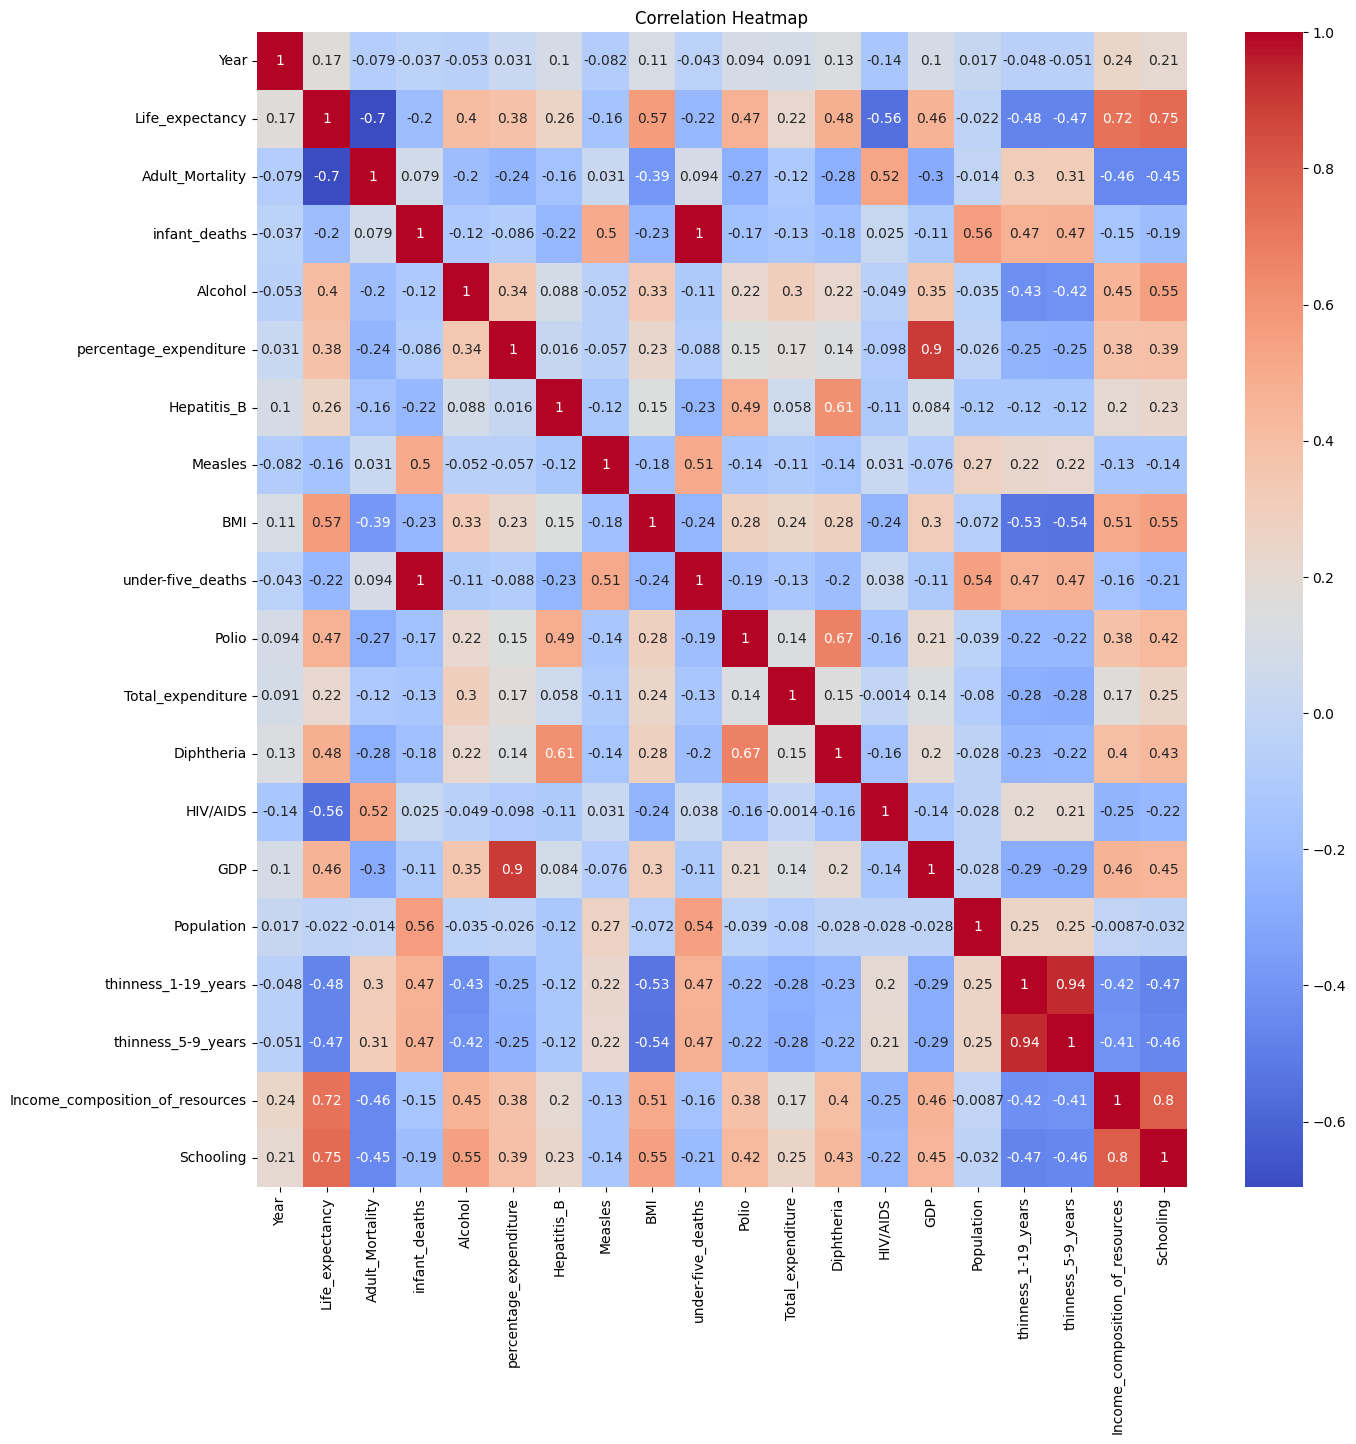

In [422]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

## From the the visualisation we conclude these have normal distribution:
- Total_expenditure	
- Schooling

so we use mean for these

In [423]:
df['Total_expenditure'].fillna(value=df['Total_expenditure'].mean(), inplace=True)
df['Schooling'].fillna(value=df['Schooling'].mean(), inplace=True)

for others i will be using KNN Imputer

In [424]:
# For Population, GDP i will be using median    --> more safe

df['Population'].fillna(value=df['Total_expenditure'].median(), inplace=True)
df['GDP'].fillna(value=df['Schooling'].median(), inplace=True)

In [425]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                            0
dtype: int64

In [426]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

null_cate_cols = [x for x in df.select_dtypes('number').columns if (x != 'Life_expectancy') & (df[x].isna().sum() > 0)]

df_subset = df[null_cate_cols]

for i in null_cate_cols:
    df[i] = impute.fit_transform(df[[i]])

In [427]:
df.isna().sum()

Country                             0
Year                                0
Status                              0
Life_expectancy                    10
Adult_Mortality                     0
infant_deaths                       0
Alcohol                             0
percentage_expenditure              0
Hepatitis_B                         0
Measles                             0
BMI                                 0
under-five_deaths                   0
Polio                               0
Total_expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
Population                          0
thinness_1-19_years                 0
thinness_5-9_years                  0
Income_composition_of_resources     0
Schooling                           0
dtype: int64

# 7. Handling Outliers

In [428]:
# Can be done only for continuous numerical data
# By observing the upper whiskers and lower whiskers from the boxplot we can conclude that

# Columns with mild/moderate outliers
clip_cols = [
    'Alcohol', 'Hepatitis_B', 'Polio', 'Total_expenditure',
    'Diphtheria', 'thinness_1-19_years', 'thinness_5-9_years'
]

# Columns with extreme outliers
extreme_clip_cols = [
    'infant_deaths', 'under-five_deaths', 'Measles',
    'percentage_expenditure', 'HIV/AIDS', 'Adult_Mortality'
]

# Columns to log-transform for ML (optional)
log_transform_cols = ['GDP', 'Population']

def clip_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

for col in clip_cols + extreme_clip_cols + log_transform_cols:
    if col in df.columns:
        clip_outliers(df, col)

In [429]:
# Log-Transform for Modeling
log_transform = False  #  Set to False if only doing EDA

if log_transform:
    for col in log_transform_cols:
        if col in df.columns:
            df[col + '_log'] = np.log1p(df[col])  # safe for 0s

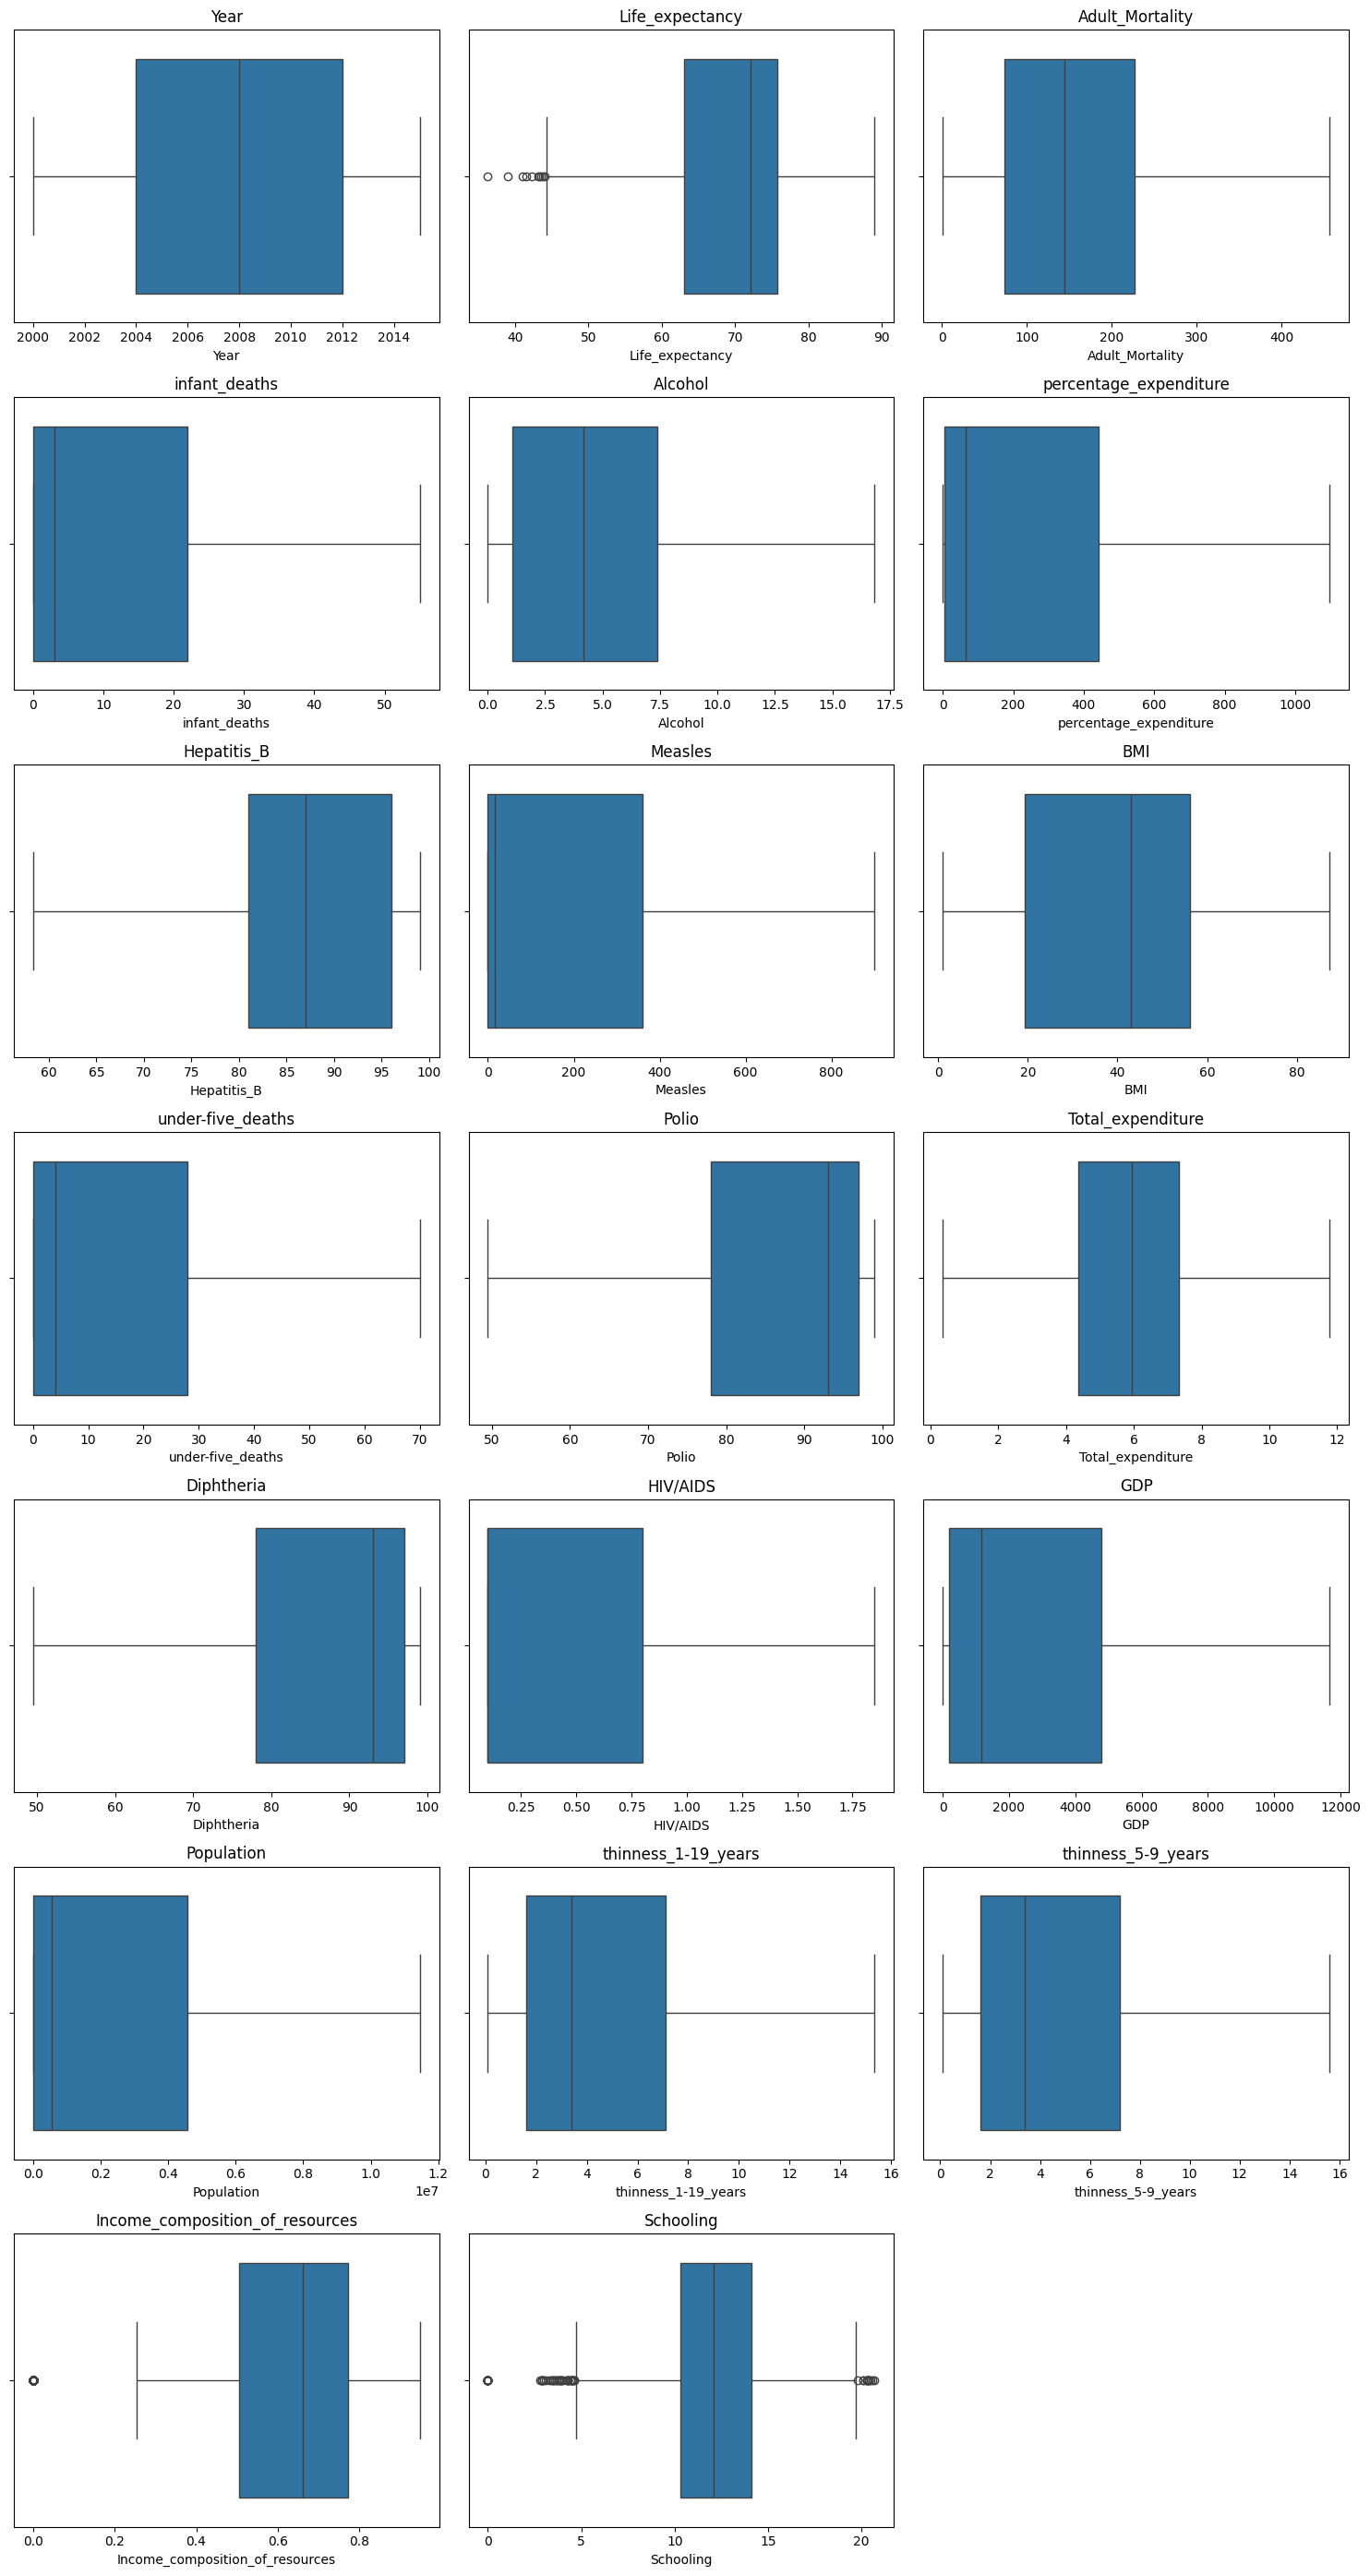

In [430]:
# Boxplot to identify outliers

num_cols = df.select_dtypes('number').columns
rows = len(num_cols) // 3 + 1

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*4))
axes = axes.flatten()   # Flatten to 1D array for easy indexing

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(ax=axes[j])

plt.tight_layout()
plt.show()

# 8. Encoding

Turning Categorical data into numerical data is called encoding

- One hot encoding
- label encoding

In [431]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                            float64
BMI                                float64
under-five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness_1-19_years                float64
thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

In [432]:
df.select_dtypes('object').columns

Index(['Country', 'Status'], dtype='object')

In [433]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [434]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

Both **Status** and **Country** are categorical/nominal values so --> one - hot encoding

In [435]:
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})
df['Status'].unique()

array([0, 1])

In [439]:
pd.get_dummies(data=df, columns=['Country'], drop_first=True, dtype='int64')

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,0,65.0,263.0,55,0.01,71.279624,65.000000,900.625,19.1,...,0,0,0,0,0,0,0,0,0,0
1,2014,0,59.9,271.0,55,0.01,73.523582,62.000000,492.000,18.6,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,55,0.01,73.219243,64.000000,430.000,18.1,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,55,0.01,78.184215,67.000000,900.625,17.6,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,59.2,275.0,55,0.01,7.097109,68.000000,900.625,17.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,456.5,27,4.36,0.000000,68.000000,31.000,27.1,...,0,0,0,0,0,0,0,0,0,1
2934,2003,0,44.5,456.5,26,4.06,0.000000,58.351153,900.625,26.7,...,0,0,0,0,0,0,0,0,0,1
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.000000,304.000,26.3,...,0,0,0,0,0,0,0,0,0,1
2936,2001,0,45.3,456.5,25,1.72,0.000000,76.000000,529.000,25.9,...,0,0,0,0,0,0,0,0,0,1


In [440]:
df.shape

(2938, 22)

But one hot encoding of country name is a bad idea because it add many more features(almost 200+) and with only 3k training data, it can lead to overfitting, and slow training of model

In [441]:
# So we use lable encoding for countries
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])

In [444]:
df.drop(['Country'], axis=1)

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Country_encoded
0,2015,0,65.0,263.0,55,0.01,71.279624,65.000000,900.625,19.1,...,8.16,65.0,0.10,584.259210,11452116.75,15.35,15.6,0.479,10.1,0
1,2014,0,59.9,271.0,55,0.01,73.523582,62.000000,492.000,18.6,...,8.18,62.0,0.10,612.696514,327582.00,15.35,15.6,0.476,10.0,0
2,2013,0,59.9,268.0,55,0.01,73.219243,64.000000,430.000,18.1,...,8.13,64.0,0.10,631.744976,11452116.75,15.35,15.6,0.470,9.9,0
3,2012,0,59.5,272.0,55,0.01,78.184215,67.000000,900.625,17.6,...,8.52,67.0,0.10,669.959000,3696958.00,15.35,15.6,0.463,9.8,0
4,2011,0,59.2,275.0,55,0.01,7.097109,68.000000,900.625,17.2,...,7.87,68.0,0.10,63.537231,2978599.00,15.35,15.6,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,456.5,27,4.36,0.000000,68.000000,31.000,27.1,...,7.13,65.0,1.85,454.366654,11452116.75,9.40,9.4,0.407,9.2,192
2934,2003,0,44.5,456.5,26,4.06,0.000000,58.351153,900.625,26.7,...,6.52,68.0,1.85,453.351155,11452116.75,9.80,9.9,0.418,9.5,192
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.000000,304.000,26.3,...,6.53,71.0,1.85,57.348340,125525.00,1.20,1.3,0.427,10.0,192
2936,2001,0,45.3,456.5,25,1.72,0.000000,76.000000,529.000,25.9,...,6.16,75.0,1.85,548.587312,11452116.75,1.60,1.7,0.427,9.8,192


# 9. Normalization

In [446]:
from sklearn.preprocessing import StandardScaler

features_to_scale = df.select_dtypes('number').columns.drop('Life_expectancy')

scaler = StandardScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [447]:
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Country_encoded
0,Afghanistan,1.621762,-0.459399,65.0,0.874521,2.165057,-1.173361,-0.546410,-1.534064,1.886225,...,0.985324,-1.282382,-0.629209,-0.649914,2.018063,2.708884,2.737658,-0.725401,-0.579931,-1.691042
1,Afghanistan,1.404986,-0.459399,59.9,0.943807,2.165057,-1.173361,-0.540647,-1.768413,0.730456,...,0.994061,-1.472525,-0.629209,-0.643014,-0.625571,2.708884,2.737658,-0.740050,-0.610570,-1.691042
2,Afghanistan,1.188210,-0.459399,59.9,0.917824,2.165057,-1.173361,-0.541429,-1.612181,0.555093,...,0.972218,-1.345763,-0.629209,-0.638391,2.018063,2.708884,2.737658,-0.769349,-0.641209,-1.691042
3,Afghanistan,0.971434,-0.459399,59.5,0.952467,2.165057,-1.173361,-0.528678,-1.377832,1.886225,...,1.142595,-1.155619,-0.629209,-0.629118,0.175128,2.708884,2.737658,-0.803531,-0.671847,-1.691042
4,Afghanistan,0.754658,-0.459399,59.2,0.978449,2.165057,-1.173361,-0.711239,-1.299715,1.886225,...,0.858634,-1.092238,-0.629209,-0.776273,0.004417,2.708884,2.737658,-0.847480,-0.763764,-1.691042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,-0.762774,-0.459399,44.3,2.550365,0.699524,-0.061908,-0.729465,-1.299715,-0.573453,...,0.535355,-1.282382,1.895041,-0.681434,2.018063,1.194717,1.177003,-1.076989,-0.855681,1.723181
2934,Zimbabwe,-0.979550,-0.459399,44.5,2.550365,0.647183,-0.138560,-0.729465,-2.053448,1.886225,...,0.268868,-1.092238,1.895041,-0.681681,2.018063,1.296510,1.302863,-1.023274,-0.763764,1.723181
2935,Zimbabwe,-1.196326,-0.459399,44.8,-0.771011,0.594843,-0.044023,-0.729465,-0.909134,0.198710,...,0.273237,-0.902095,1.895041,-0.777775,-0.673587,-0.892033,-0.861917,-0.979326,-0.610570,1.723181
2936,Zimbabwe,-1.413102,-0.459399,45.3,2.550365,0.594843,-0.736445,-0.729465,-0.674785,0.835108,...,0.111598,-0.648570,1.895041,-0.658570,2.018063,-0.790240,-0.761229,-0.979326,-0.671847,1.723181


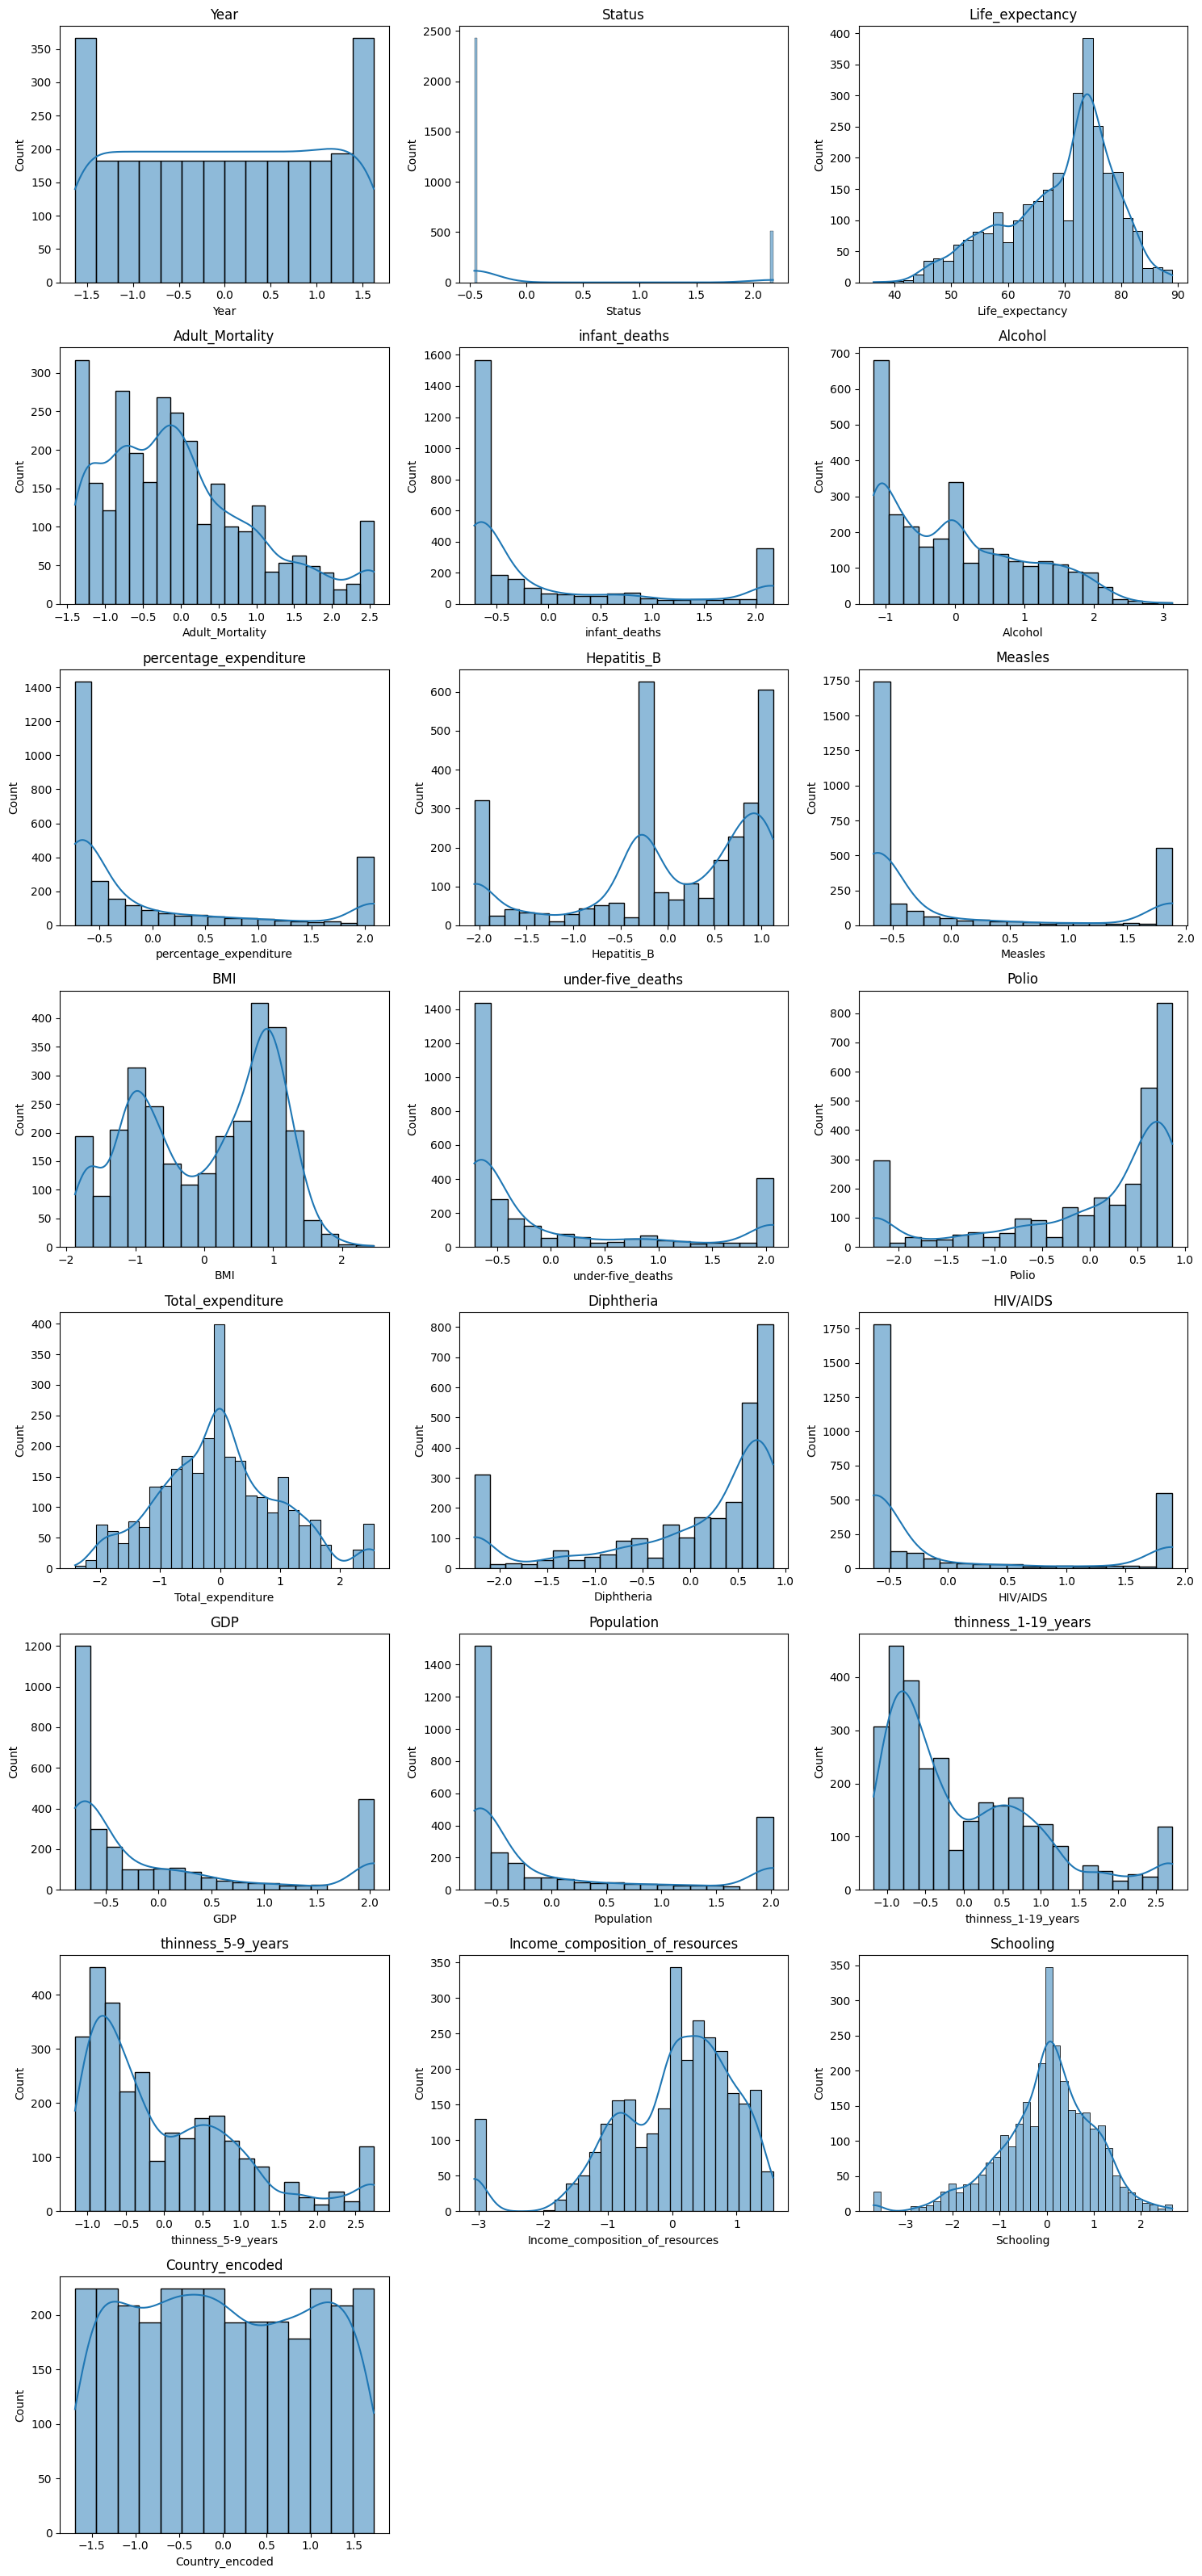

In [448]:
# Histogram to understand the distribution

# import warnings
# warnings.filterwarnings('ignore')

# for i in df.select_dtypes('number').columns:
#     sns.histplot(df, x=i, kde=True)
#     plt.show()

num_cols = df.select_dtypes('number').columns
n = len(num_cols)
rows = (n // 3) + 1

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

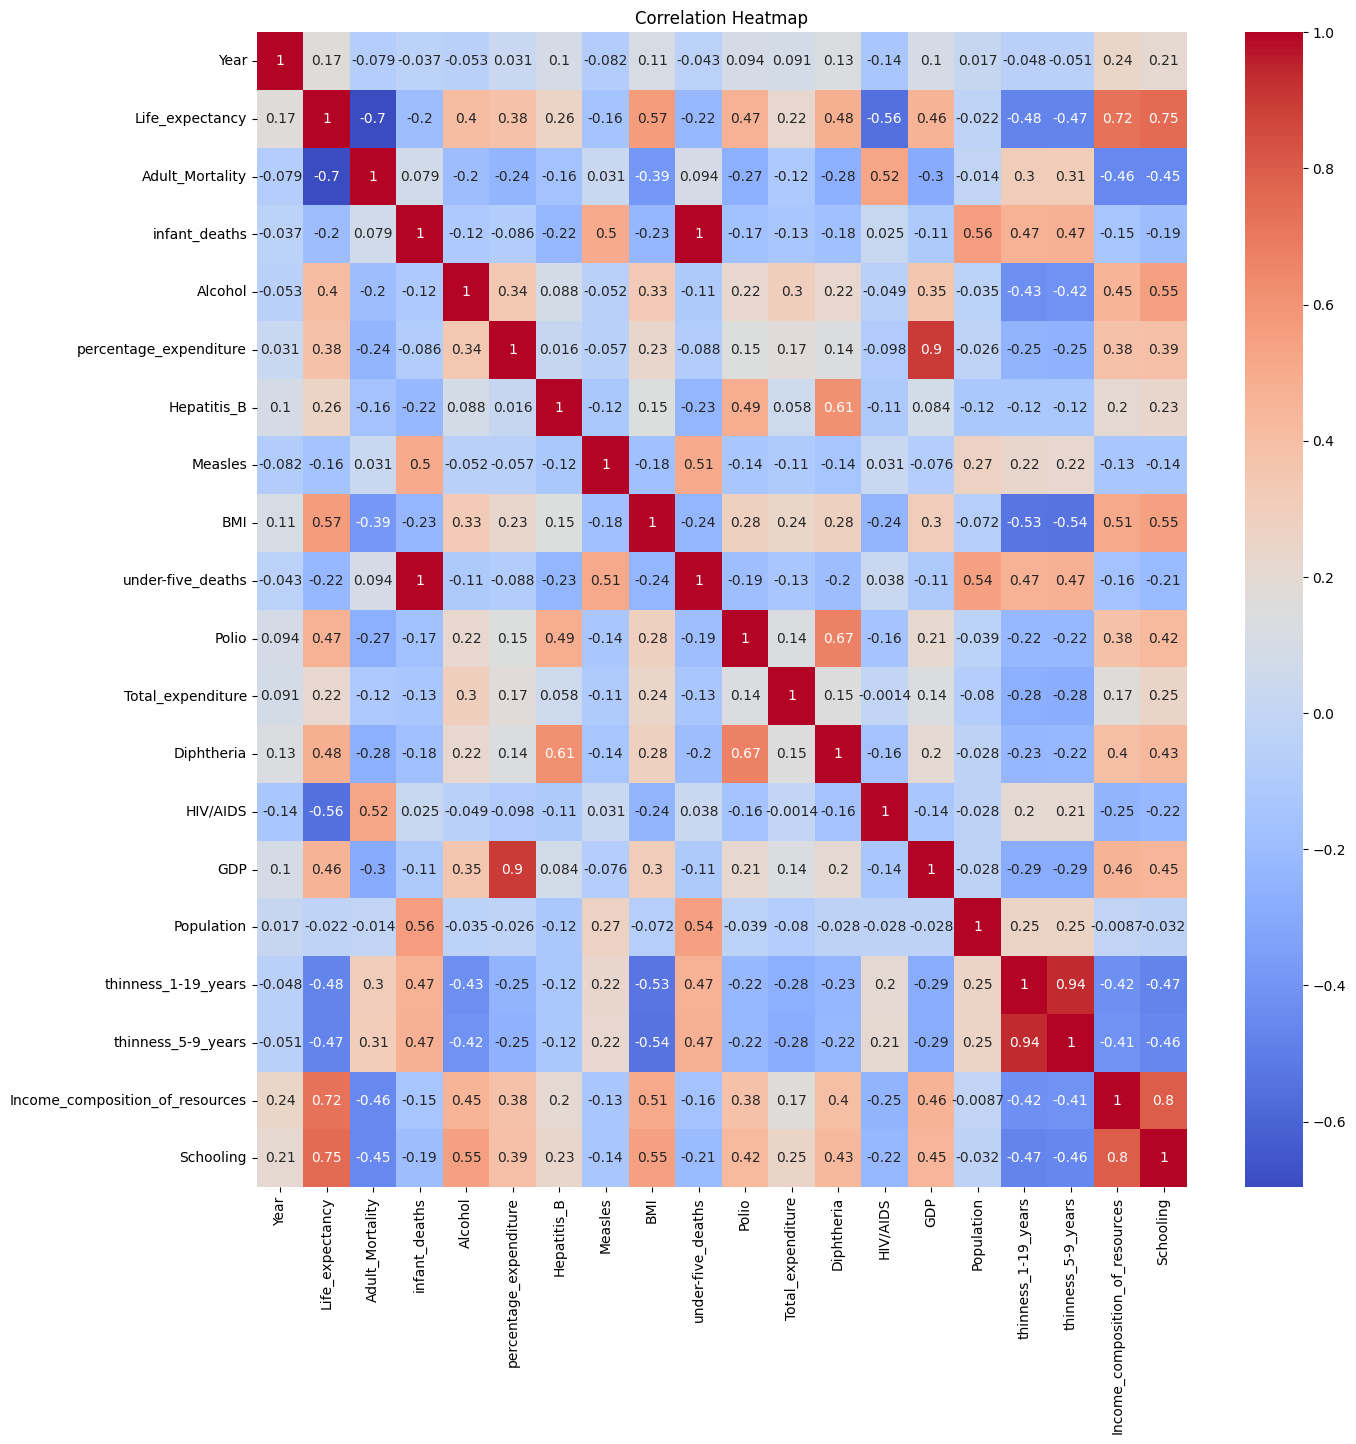

In [449]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

## Observations:
- Income_composition_of_resources is highly correlated with Schooling
- thinness_1-19_years is highly correlated with thinness_5-9_years
- percentage_expenditure is highly correlated with GDP
- under_5_deaths is highly correlated with infant_deaths
- Hepatitis_B, Diphtheria have correlation with Polio